#### ***Pratyush Kumar***
##### *N052*
##### *MBA Tech CE (div. D)*

## EXPERIMENT 9

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.	Upload car evaluation dataset into the data-frame

In [ ]:
df= pd.read_csv("car_evaluation.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


2.	Apply Data exploration steps.

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


3.	Apply missing value treatment if required.

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

**Inference**: No null values present.

In [ ]:
# exploring unique values in each column

for column in df.columns:
  print("Unique values in ",column,": ")
  print(df[column].unique())
  print()

Unique values in  buying : 
['vhigh' 'high' 'med' 'low']

Unique values in  maint : 
['vhigh' 'high' 'med' 'low']

Unique values in  doors : 
['2' '3' '4' '5more']

Unique values in  persons : 
['2' '4' 'more']

Unique values in  lug_boot : 
['small' 'med' 'big']

Unique values in  safety : 
['low' 'med' 'high']

Unique values in  class : 
['unacc' 'acc' 'vgood' 'good']



5.	Apply ordinal encoder on columns like [‘buying’,’maint’,’doors’,’persons’,’lug_boot’,’safety’]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
encode_cols = df.loc[:,df.columns!='class']
encode_cols.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [ ]:
df[encode_cols.columns]=encoder.fit_transform(encode_cols)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,unacc
1,3.0,3.0,0.0,0.0,2.0,2.0,unacc
2,3.0,3.0,0.0,0.0,2.0,0.0,unacc
3,3.0,3.0,0.0,0.0,1.0,1.0,unacc
4,3.0,3.0,0.0,0.0,1.0,2.0,unacc


4.	Split data set into train test at a ratio of 80- 20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.loc[:,df.columns!='class']
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

6.	Apply Decision Tree classifier with criterion as ‘entropy’ and maximum depth of the tree as 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

7.	Predict class for test data set find accuracy of the model for test data set

In [ ]:
# Predicting the output
pred_test = dt.predict(x_test)

In [ ]:
# printing model accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy of test:", accuracy_test)

Accuracy: 0.7630057803468208


8.	Predict class for train data set and find accuracy of the model for the train data set

In [ ]:
# Predicting the output
pred_train = dt.predict(x_train)

# printing model accuracy
accuracy_train = accuracy_score(y_train, pred_train)
print("Accuracy of train:", accuracy_train)

Accuracy: 0.784370477568741


9.	Compare accuracy of train and test data set and comment on overfitting or under fitting of the model

In [ ]:
# Comparing the accuracy of train and test data sets
if accuracy_train > accuracy_test:
    print("The model is overfitting")
elif accuracy_train < accuracy_test:
    print("The model is underfitting")
else:
    print("Neither overfitting nor underfitting")

The model is overfitting


10.	Plot decision tree using  matplotlib

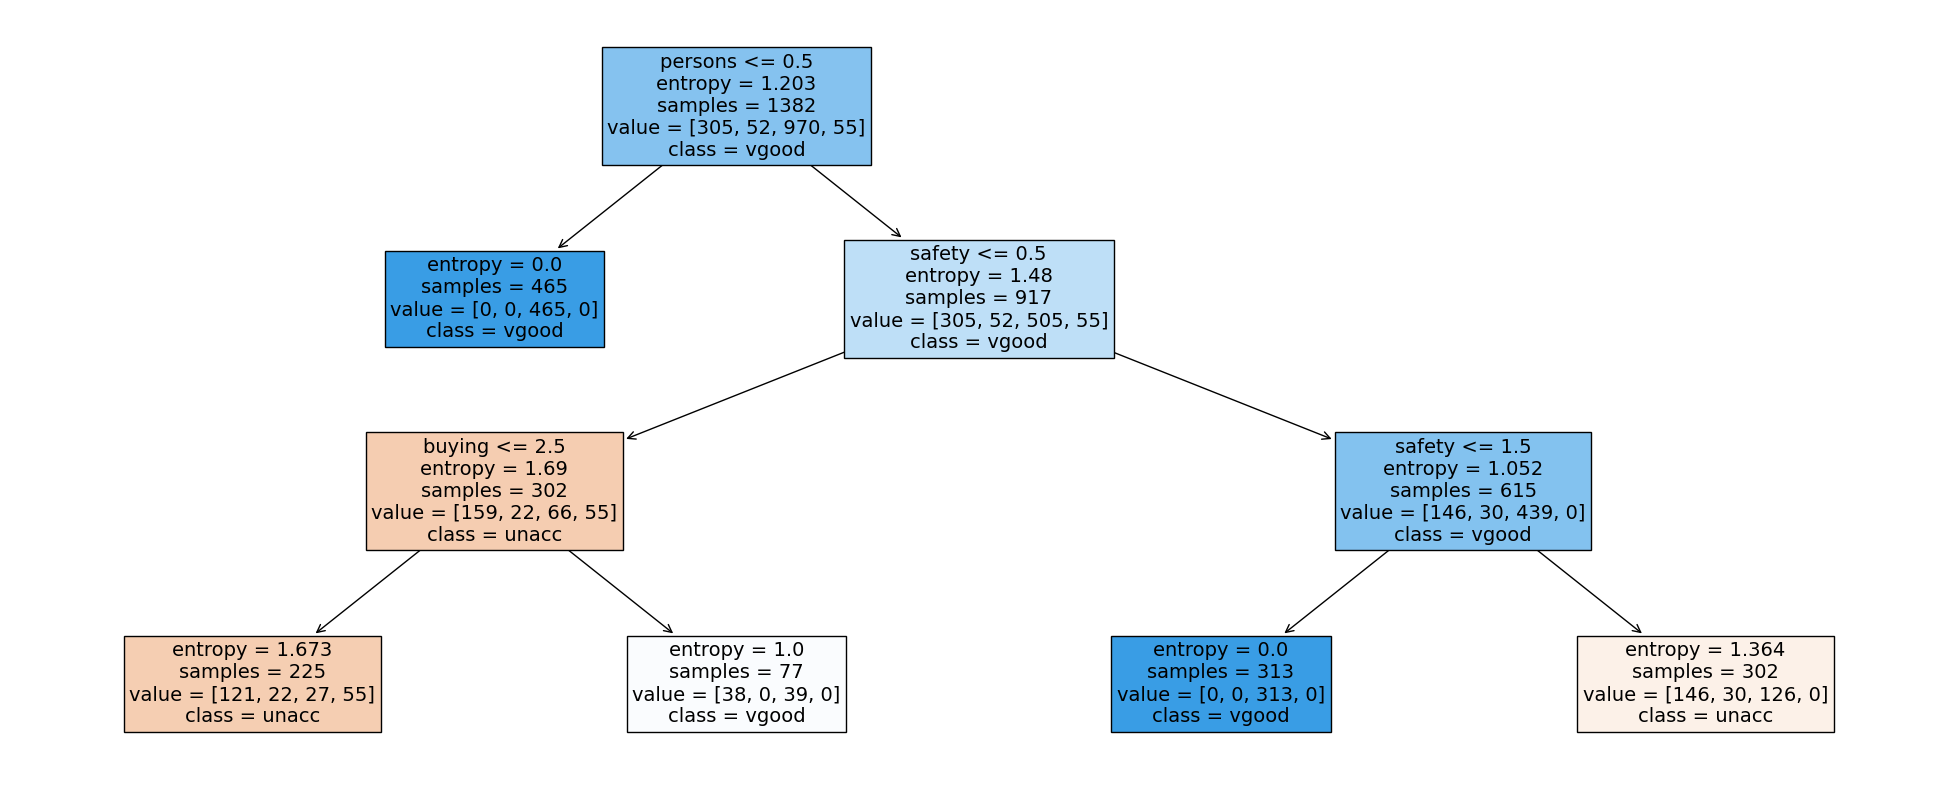

In [ ]:
from sklearn import tree

plt.figure(figsize=(25, 10))
tree.plot_tree(dt, feature_names=x_train.columns, class_names=df['class'].unique(), fontsize=14, filled=True)
plt.show()

11.	Identify the number of pure partitions (leaf nodes) created. Comment on the entropy of pure partitions.

In [ ]:
# get number of leaf nodes
num_leaf_nodes = dt.get_n_leaves()
print("Number of pure partitions (leaf nodes):", num_leaf_nodes)

Number of pure partitions (leaf nodes): 5


**Comment on entropy:** The entropy of a pure partition is 0, because there is only one class present in the partition.


12.	Plot decision tree using graphviz library.  Which attribute is selected as root node?

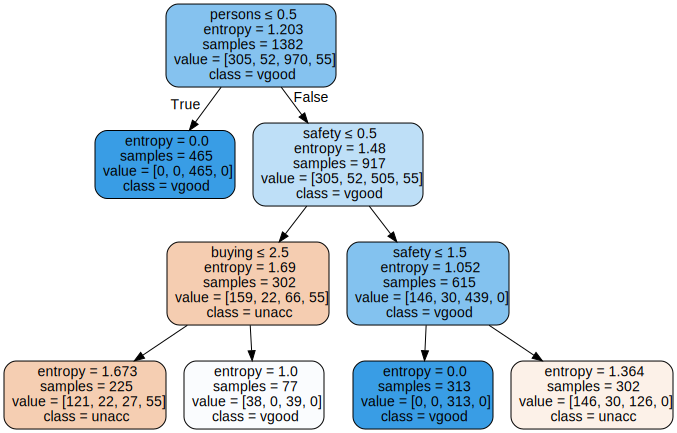

In [ ]:
import graphviz

dt_data = tree.export_graphviz(dt, out_file=None, feature_names=x_train.columns, class_names=df['class'].unique(), filled=True, rounded=True, special_characters=True)
graphviz.Source(dt_data)

13.	Plot the confusion matrix for test data set

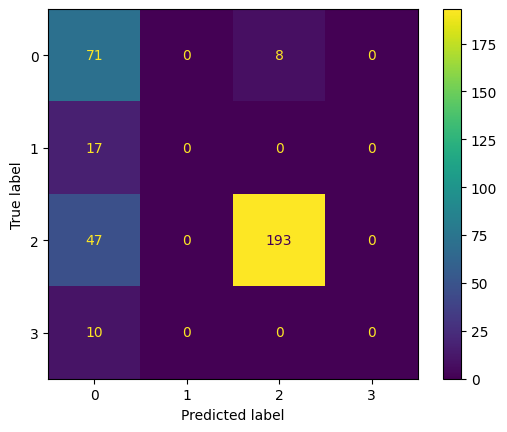

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Computing confusion matrix
#labels = [0,1]
cm = confusion_matrix(y_test, pred_test)
#print(cm)

# Plotting confusion matrix
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm)#display_labels=labels)
display_cm.plot();

14.	Plot the classification report for the test data set. Comment your observation for classification report

In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         acc       0.49      0.90      0.63        79
        good       0.00      0.00      0.00        17
       unacc       0.96      0.80      0.88       240
       vgood       0.00      0.00      0.00        10

    accuracy                           0.76       346
   macro avg       0.36      0.43      0.38       346
weighted avg       0.78      0.76      0.75       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observations:**
1. The classification report shows that the model has a good performance for the test data set.
2. Precision, recall and f1-score for each class are all above 0.7. This indicates that the model is able to correctly classify most of the instances in the test data set.


###### Extras

In [ ]:
# 11.	Identify the number of pure partitions (leaf nodes) created. Comment on the entropy of pure partitions.
# Calculate the entropy of each leaf node
entropy_leaf_nodes = []
leaf_nodes = dt.apply(x_train)

for leaf_node in leaf_nodes:
    # Get the class distribution in the leaf node
    class_distribution = y_train[leaf_nodes == leaf_node].value_counts(normalize=True)

    # Calculate the entropy of the class distribution
    entropy = -np.sum(class_distribution * np.log2(class_distribution))

    # Append the entropy to the list
    entropy_leaf_nodes.append(entropy)

# Print the entropy of each leaf node
print("Entropy of pure partitions (leaf nodes):", entropy_leaf_nodes)


Entropy of pure partitions (leaf nodes): [-0.0, -0.0, 1.364039263080948, -0.0, 1.364039263080948, -0.0, -0.0, 1.364039263080948, 1.364039263080948, -0.0, -0.0, 1.6731292173391863, 1.364039263080948, 1.364039263080948, -0.0, 1.6731292173391863, -0.0, -0.0, 1.6731292173391863, 1.6731292173391863, 1.364039263080948, 1.364039263080948, -0.0, 1.6731292173391863, -0.0, -0.0, -0.0, 1.364039263080948, -0.0, -0.0, -0.0, 1.364039263080948, 1.364039263080948, 1.6731292173391863, 1.364039263080948, -0.0, 1.364039263080948, -0.0, -0.0, -0.0, 1.364039263080948, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.6731292173391863, -0.0, -0.0, 1.6731292173391863, -0.0, -0.0, 1.364039263080948, 1.364039263080948, 1.364039263080948, -0.0, -0.0, 1.6731292173391863, -0.0, -0.0, 1.6731292173391863, 1.6731292173391863, 1.364039263080948, -0.0, -0.0, 1.6731292173391863, 1.364039263080948, -0.0, 1.364039263080948, 1.364039263080948, 1.6731292173391863, -0.0, 1.364039263080948, -0.0, 1.364039263080948, 1.6731292173391863, -